### Przygotowanie do zajęć

1. W konsoli linuxowej:
 - pip install gensim
 - pip install nltk

2. w Jupyterze (pobieranie zasobów):
 - `import nltk`
 - `nltk.download()` (wyskoczy okienko)
 - zanaczamy wiersz "popular" i klikamy "download"

3. w Jupyterze:
 - `from sklearn.datasets import fetch_20newsgroups`
 - `newsgroups_train = fetch_20newsgroups(subset='train')`
 
 
 
### Materiały i źródła:

https://radimrehurek.com/gensim/wiki.html

http://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html

https://www.ariddell.org/lda.html

http://brandonrose.org/clustering

http://totoharyanto.staff.ipb.ac.id/files/2012/10/Building-Machine-Learning-Systems-with-Python-Richert-Coelho.pdf

https://de.dariah.eu/tatom/topic_model_python.html

# Analiza danych tekstowych - text mining

## Obróbka tekstu

In [2]:
import nltk
from bs4 import BeautifulSoup
import numpy as np

wiki = "http://en.wikipedia.org/wiki/"
titles = ["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]

from urllib.request import urlopen

def parse(url):        
    x = urlopen(url)
    x = x.read()
    x = BeautifulSoup(x)
    x = x.find("div",id="bodyContent")
    x = x.find_all("p")
    return(x)

articles = [parse(url) for url in [wiki+x for x in titles]]

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/kodolamacz/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [3]:
articles[0]

[<p>In <a href="/wiki/Mathematics" title="Mathematics">mathematics</a>, an <b>integral</b> assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining <a href="/wiki/Infinitesimal" title="Infinitesimal">infinitesimal</a> data. Integration is one of the two main operations of <a href="/wiki/Calculus" title="Calculus">calculus</a>, with its inverse operation, <a href="/wiki/Derivative" title="Derivative">differentiation</a>, being the other. Given a <a href="/wiki/Function_(mathematics)" title="Function (mathematics)">function</a> <span class="texhtml mvar" style="font-style:italic;">f</span> of a <a href="/wiki/Real_number" title="Real number">real</a> <a href="/wiki/Variable_(mathematics)" title="Variable (mathematics)">variable</a> <span class="texhtml mvar" style="font-style:italic;">x</span> and an <a href="/wiki/Interval_(mathematics)" title="Interval (mathematics)">interval</a> <span class="texhtml">[<i>a</i>, <i>b

In [4]:
import re
articles = [re.sub("<.+?>"," ",str(a)) for a in articles]
articles[0]

'[ In  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. Integration is one of the two main operations of  calculus , with its inverse operation,  differentiation , being the other. Given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral \n ,  is defined informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . The area above the  x -axis adds to the total and that below the  x -axis subtracts from the total.\n ,  The operation of integration, up to an additive constant, is the inverse of the operation of differentiation. For this reason, the term  integral  may also refer to the related notion of the  antiderivative , a function  F  whose derivative is the given function  f . In this c

In [5]:
articles = [a.lower() for a in articles]
articles[0]

'[ in  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. integration is one of the two main operations of  calculus , with its inverse operation,  differentiation , being the other. given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral \n ,  is defined informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . the area above the  x -axis adds to the total and that below the  x -axis subtracts from the total.\n ,  the operation of integration, up to an additive constant, is the inverse of the operation of differentiation. for this reason, the term  integral  may also refer to the related notion of the  antiderivative , a function  f  whose derivative is the given function  f . in this c

In [6]:
articles = [nltk.word_tokenize(a) for a in articles]
articles[0]

['[',
 'in',
 'mathematics',
 ',',
 'an',
 'integral',
 'assigns',
 'numbers',
 'to',
 'functions',
 'in',
 'a',
 'way',
 'that',
 'can',
 'describe',
 'displacement',
 ',',
 'area',
 ',',
 'volume',
 ',',
 'and',
 'other',
 'concepts',
 'that',
 'arise',
 'by',
 'combining',
 'infinitesimal',
 'data',
 '.',
 'integration',
 'is',
 'one',
 'of',
 'the',
 'two',
 'main',
 'operations',
 'of',
 'calculus',
 ',',
 'with',
 'its',
 'inverse',
 'operation',
 ',',
 'differentiation',
 ',',
 'being',
 'the',
 'other',
 '.',
 'given',
 'a',
 'function',
 'f',
 'of',
 'a',
 'real',
 'variable',
 'x',
 'and',
 'an',
 'interval',
 '[',
 'a',
 ',',
 'b',
 ']',
 'of',
 'the',
 'real',
 'line',
 ',',
 'the',
 'definite',
 'integral',
 ',',
 'is',
 'defined',
 'informally',
 'as',
 'the',
 'signed',
 'area',
 'of',
 'the',
 'region',
 'in',
 'the',
 'xy',
 '-plane',
 'that',
 'is',
 'bounded',
 'by',
 'the',
 'graph',
 'of',
 'f',
 ',',
 'the',
 'x',
 '-axis',
 'and',
 'the',
 'vertical',
 'lines',
 

In [7]:
?nltk.word_tokenize

In [8]:
?nltk.TreebankWordTokenizer

In [9]:
# usuwanie znakow interpunkcyjnych 
# (zrobienie tego przed tokenizacja popsuloby tokenizacje)

import string
articles = [[w for w in a if w not in string.punctuation] for a in articles]
articles[0]

['in',
 'mathematics',
 'an',
 'integral',
 'assigns',
 'numbers',
 'to',
 'functions',
 'in',
 'a',
 'way',
 'that',
 'can',
 'describe',
 'displacement',
 'area',
 'volume',
 'and',
 'other',
 'concepts',
 'that',
 'arise',
 'by',
 'combining',
 'infinitesimal',
 'data',
 'integration',
 'is',
 'one',
 'of',
 'the',
 'two',
 'main',
 'operations',
 'of',
 'calculus',
 'with',
 'its',
 'inverse',
 'operation',
 'differentiation',
 'being',
 'the',
 'other',
 'given',
 'a',
 'function',
 'f',
 'of',
 'a',
 'real',
 'variable',
 'x',
 'and',
 'an',
 'interval',
 'a',
 'b',
 'of',
 'the',
 'real',
 'line',
 'the',
 'definite',
 'integral',
 'is',
 'defined',
 'informally',
 'as',
 'the',
 'signed',
 'area',
 'of',
 'the',
 'region',
 'in',
 'the',
 'xy',
 '-plane',
 'that',
 'is',
 'bounded',
 'by',
 'the',
 'graph',
 'of',
 'f',
 'the',
 'x',
 '-axis',
 'and',
 'the',
 'vertical',
 'lines',
 'x',
 'a',
 'and',
 'x',
 'b',
 'the',
 'area',
 'above',
 'the',
 'x',
 '-axis',
 'adds',
 'to'

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [12]:
articles = [[w for w in a if w not in nltk.corpus.stopwords.words("english")] for a in articles]
articles[0]

['mathematics',
 'integral',
 'assigns',
 'numbers',
 'functions',
 'way',
 'describe',
 'displacement',
 'area',
 'volume',
 'concepts',
 'arise',
 'combining',
 'infinitesimal',
 'data',
 'integration',
 'one',
 'two',
 'main',
 'operations',
 'calculus',
 'inverse',
 'operation',
 'differentiation',
 'given',
 'function',
 'f',
 'real',
 'variable',
 'x',
 'interval',
 'b',
 'real',
 'line',
 'definite',
 'integral',
 'defined',
 'informally',
 'signed',
 'area',
 'region',
 'xy',
 '-plane',
 'bounded',
 'graph',
 'f',
 'x',
 '-axis',
 'vertical',
 'lines',
 'x',
 'x',
 'b',
 'area',
 'x',
 '-axis',
 'adds',
 'total',
 'x',
 '-axis',
 'subtracts',
 'total',
 'operation',
 'integration',
 'additive',
 'constant',
 'inverse',
 'operation',
 'differentiation',
 'reason',
 'term',
 'integral',
 'may',
 'also',
 'refer',
 'related',
 'notion',
 'antiderivative',
 'function',
 'f',
 'whose',
 'derivative',
 'given',
 'function',
 'f',
 'case',
 'called',
 'indefinite',
 'integral',
 'writ

In [13]:
stemmer = nltk.PorterStemmer()
articles = [[stemmer.stem(w) for w in a] for a in articles]
articles[0]

['mathemat',
 'integr',
 'assign',
 'number',
 'function',
 'way',
 'describ',
 'displac',
 'area',
 'volum',
 'concept',
 'aris',
 'combin',
 'infinitesim',
 'data',
 'integr',
 'one',
 'two',
 'main',
 'oper',
 'calculu',
 'invers',
 'oper',
 'differenti',
 'given',
 'function',
 'f',
 'real',
 'variabl',
 'x',
 'interv',
 'b',
 'real',
 'line',
 'definit',
 'integr',
 'defin',
 'inform',
 'sign',
 'area',
 'region',
 'xy',
 '-plane',
 'bound',
 'graph',
 'f',
 'x',
 '-axi',
 'vertic',
 'line',
 'x',
 'x',
 'b',
 'area',
 'x',
 '-axi',
 'add',
 'total',
 'x',
 '-axi',
 'subtract',
 'total',
 'oper',
 'integr',
 'addit',
 'constant',
 'invers',
 'oper',
 'differenti',
 'reason',
 'term',
 'integr',
 'may',
 'also',
 'refer',
 'relat',
 'notion',
 'antideriv',
 'function',
 'f',
 'whose',
 'deriv',
 'given',
 'function',
 'f',
 'case',
 'call',
 'indefinit',
 'integr',
 'written',
 'integr',
 'discuss',
 'articl',
 'term',
 'definit',
 'integr',
 'fundament',
 'theorem',
 'calculu',
 '

In [14]:
articles[0]

['mathemat',
 'integr',
 'assign',
 'number',
 'function',
 'way',
 'describ',
 'displac',
 'area',
 'volum',
 'concept',
 'aris',
 'combin',
 'infinitesim',
 'data',
 'integr',
 'one',
 'two',
 'main',
 'oper',
 'calculu',
 'invers',
 'oper',
 'differenti',
 'given',
 'function',
 'f',
 'real',
 'variabl',
 'x',
 'interv',
 'b',
 'real',
 'line',
 'definit',
 'integr',
 'defin',
 'inform',
 'sign',
 'area',
 'region',
 'xy',
 '-plane',
 'bound',
 'graph',
 'f',
 'x',
 '-axi',
 'vertic',
 'line',
 'x',
 'x',
 'b',
 'area',
 'x',
 '-axi',
 'add',
 'total',
 'x',
 '-axi',
 'subtract',
 'total',
 'oper',
 'integr',
 'addit',
 'constant',
 'invers',
 'oper',
 'differenti',
 'reason',
 'term',
 'integr',
 'may',
 'also',
 'refer',
 'relat',
 'notion',
 'antideriv',
 'function',
 'f',
 'whose',
 'deriv',
 'given',
 'function',
 'f',
 'case',
 'call',
 'indefinit',
 'integr',
 'written',
 'integr',
 'discuss',
 'articl',
 'term',
 'definit',
 'integr',
 'fundament',
 'theorem',
 'calculu',
 '

In [15]:
articles = [' '.join(x) for x in articles]

In [16]:
articles[0]

"mathemat integr assign number function way describ displac area volum concept aris combin infinitesim data integr one two main oper calculu invers oper differenti given function f real variabl x interv b real line definit integr defin inform sign area region xy -plane bound graph f x -axi vertic line x x b area x -axi add total x -axi subtract total oper integr addit constant invers oper differenti reason term integr may also refer relat notion antideriv function f whose deriv given function f case call indefinit integr written integr discuss articl term definit integr fundament theorem calculu connect differenti definit integr f continu real-valu function defin close interv b antideriv f f known definit integr f interv given principl integr formul independ isaac newton gottfri wilhelm leibniz late 17th centuri thought integr infinit sum rectangl infinitesim width bernhard riemann gave rigor mathemat definit integr base limit procedur approxim area curvilinear region break region thin

# Reprezentacje tekstu

## Podstawowa reprezentacja macierzowa - liczności

In [18]:
from sklearn.feature_extraction.text import CountVectorizer 

In [18]:
?CountVectorizer

In [19]:
c = CountVectorizer(token_pattern='(?u)\\b\\w+\\b',min_df=3,max_df=0.5)

# '(?u)\\b\\w+\\b' - domyslnie jest regex, ktory wyciag slowa przynajmniej DWUliterowe!

dtm = c.fit(articles)
art = dtm.transform(articles)
art

<11x1243 sparse matrix of type '<class 'numpy.int64'>'
	with 4612 stored elements in Compressed Sparse Row format>

Mamy tu do czynienia z macierzami rzadkimi - wymagają specjalnej obsługi, bo w normalnej postaci byłyby za duże.

In [20]:
dtm.vocabulary_

{'mathemat': 815,
 'integr': 737,
 'assign': 310,
 'volum': 1208,
 'combin': 411,
 'infinitesim': 728,
 'oper': 884,
 'calculu': 371,
 'differenti': 500,
 'variabl': 1190,
 'x': 1232,
 'interv': 743,
 'inform': 730,
 'sign': 1062,
 'plane': 924,
 'bound': 353,
 'graph': 654,
 'add': 262,
 'total': 1151,
 'speak': 1081,
 'notion': 870,
 'discuss': 508,
 'articl': 307,
 'fundament': 636,
 'theorem': 1138,
 'connect': 439,
 'principl': 945,
 'formul': 625,
 'newton': 859,
 'late': 774,
 '17th': 79,
 'infinit': 727,
 'sum': 1115,
 'bernhard': 340,
 'riemann': 1021,
 'rigor': 1022,
 'break': 356,
 'type': 1174,
 'domain': 517,
 'perform': 916,
 'replac': 1006,
 'certain': 380,
 'curv': 462,
 'surfac': 1120,
 'document': 516,
 'techniqu': 1132,
 'method': 827,
 'exhaust': 582,
 'greek': 659,
 'divis': 515,
 'employ': 543,
 'calcul': 370,
 'circl': 395,
 'china': 388,
 'ad': 260,
 'and': 286,
 'mathematician': 816,
 '2004': 157,
 '125': 27,
 '126': 28,
 'signific': 1063,
 'advanc': 267,
 'fou

In [24]:
dtm.get_feature_names()

'add'

In [25]:
art

<11x1240 sparse matrix of type '<class 'numpy.int64'>'
	with 4593 stored elements in Compressed Sparse Row format>

In [26]:
art.getcol(dtm.get_feature_names().index("kingdom")).todense()

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [7],
        [2],
        [3]])

In [27]:
art.getrow(0).todense()

matrix([[19,  0,  0, ...,  2,  2,  0]])

## Zadanie - stworzyć macierz ze słowami, w której i-ty wiersz przechowuje k najczęstszych słów z i-tego dokumentu.

In [28]:
def top_words(M,dtm,k):
    words = np.array(dtm.get_feature_names())
    return(np.array([words[np.squeeze(np.array(np.argsort(M[i,:].todense())))[-k:]] for i in range(M.shape[0])]))

top_words(art,dtm,6)

array([['differenti', 'sum', 'riemann', 'interv', 'x', 'integr'],
       ['interv', 'ε', 'sum', 'x', 'riemann', 'integr'],
       ['displaystyl', 'partit', 'x', 'stieltj', 'riemann', 'integr'],
       ['variabl', 'linear', 'differenti', 'vector', 'h', 'x'],
       ['gt', 'converg', '0', 'to', 'displaystyl', 'x'],
       ['version', 'love', 'berlin', 'exhibit', 'portrait', 'paint'],
       ['1890', '1889', 'pari', 'portrait', 'paint', 'van'],
       ['academi', 'portrait', 'painter', 'histor', 'fine', 'paint'],
       ['china', 'anna', 'teach', 'wrote', 'novel', 'russian'],
       ['writer', 'literari', 'jewish', 'franz', 'der', 'stori'],
       ['british', 'middle', 'tale', 'wrote', 'stori', 'english']], 
      dtype='<U13')

## LSI - *Latent Semantic Indexing* 

Czyli wykrycie w tekście znaczeń przy użyciu SVD.

In [30]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3) # CHCEMY WZIĄĆ Z MACIERZY V TYLKO 3 CEHCY UKRYTE
svd.fit(art)
art_lsi = svd.transform(art) # CZYLI TO JEST TA NASZA V!

art_lsi # PRZEANALIZUJMY PODOBIEŃSTWO - WIERSZE TO DOKUMENTY - JEST DOBRZE!

array([[  2.98198137e+02,  -3.25354340e+00,  -2.41787413e+01],
       [  1.87726788e+02,  -2.86149970e+00,  -2.96245126e+01],
       [  5.75097182e+01,  -6.69112255e-01,  -2.87721763e+00],
       [  7.60105286e+01,   1.22858691e-02,   1.49528288e+02],
       [  2.99159880e+01,   1.26345436e-01,   5.11538519e+01],
       [  1.88183236e+00,   5.03988231e+01,   1.18174484e+00],
       [  4.60857342e+00,   2.75383251e+02,  -1.94237026e+00],
       [  6.24384426e-01,   1.82437971e+01,   2.48265512e-01],
       [  8.47354782e-01,   8.29744890e+00,   1.54992291e+00],
       [  2.29158665e+00,   1.61766444e+01,   5.30669321e+00],
       [  4.55905945e+00,   2.66917568e+01,   7.43454417e+00]])

In [31]:
titles

['Integral',
 'Riemann_integral',
 'Riemann-Stieltjes_integral',
 'Derivative',
 'Limit_of_a_sequence',
 'Edvard_Munch',
 'Vincent_van_Gogh',
 'Jan_Matejko',
 'Lev_Tolstoj',
 'Franz_Kafka',
 'J._R._R._Tolkien']

## TF-IDF

### https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
?TfidfVectorizer

In [33]:
tfidf = TfidfVectorizer()
art = tfidf.fit_transform(articles)
art

<11x6682 sparse matrix of type '<class 'numpy.float64'>'
	with 13423 stored elements in Compressed Sparse Row format>

In [34]:
top_words(art,tfidf,6)

array([['differenti', 'antideriv', 'riemann', 'interv', 'function',
        'integr'],
       ['function', 'sum', 'partit', 'interv', 'integr', 'riemann'],
       ['displaystyl', 'partit', 'function', 'stieltj', 'riemann', 'integr'],
       ['quotient', 'linear', 'differenti', 'vector', 'function', 'deriv'],
       ['frac', 'to', 'limit', 'x_', 'sequenc', 'displaystyl'],
       ['edvard', 'museum', 'cm', 'paint', 'oslo', 'munch'],
       ['arl', '1888', 'theo', 'paint', 'van', 'gogh'],
       ['poland', 'jan', 'paint', 'polish', 'kraków', 'matejko'],
       ['gandhi', 'peac', 'anarchist', 'russian', 'war', 'tolstoy'],
       ['franz', 'publish', 'stori', 'work', 'brod', 'kafka'],
       ['edith', 'english', 'hobbit', 'ring', 'lord', 'tolkien']], 
      dtype='<U18')

Pytanie: do czego innego można zastosować TFIDF niż ważności słów w tekście?

### Uwaga: do mierzenia podobieństwa tekstów dobrze sprawdza się miara cosinusowa! (np. w grupowaniu)

https://en.wikipedia.org/wiki/Cosine_similarity

Mierzy ona podobieństwo wektorów na podstawie rozkładu wartości elementów (proporcji), a nie wartości bewzględnych. Matematycznie: podobieństwo jest określane na podstawie kąta pomiędzy wektorami (wartości cosinusa tego kąta), a nie na podstawie długości wektorów.

## Zadanie - otagować teksty korpusu 20newsgroups

In [35]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [36]:
from pprint import pprint
pprint(list(newsgroups_train.target_names)) # kategorie tematyczne:

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [37]:
newsgroups_train.target # kategorie kolejnych dokumentów

array([7, 4, 4, ..., 3, 1, 8])

In [38]:
newsgroups_train.data[0] # przeanalizowac strukture

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

# Model LDA - Latent Dirichlet Allocation (ukryta alokacja Dirichleta)


Motywacja: przedstawienie tekstu jako mieszanki tematów.


Temat - rozkład prawdopodobieństwa na zbiorze słów.


Przykład:
*  <s>Mam</s> gorączkę <s>i</s> katar.
* Graliśmy <s>w</s> siatkówkę.
* Grając <s>w</s> piłkę, wzmacniamy organizm.


Ile "tematów" widzimy?
<br>

<br>

<br>

<br>

<br>

<br>

Intuicyjnie: dwa tematy: "sport" oraz "zdrowie".
* Pierwsze zdanie = 100% zdrowie
* Drugie zdanie = 100% sport
* Trzecie zdanie = 50% sport + 50% zdrowie


## Rozkład Dirichleta 

Jest to rozkład, na którym opiera się model LDA

Gęstość trójwymiarowego rozkładu Dirichleta Dir($\alpha$).

Wektor losowy $(x_1 , ..., x_K )$ z $K$-wymiarowego rozkładu Dirichleta to punkt na $(K-1)$-wymiarowym "trójkącie" (sympleksie), czyli $x_1 + ... + x_K = 1$, $x_i \geq 0$.

$\alpha=3$ | $\alpha=0.95$
- | - 
![alt](Grafika/dir3.jpg) | ![alt](Grafika/dir095.jpg)


W modelu LDA będziemy zakładać, że tematy składające się na dokument, pochodzą z rozkładu Dirichleta.

## Ale $\alpha$ może być wektorem, czyli $\alpha = (\alpha_1, ..., \alpha_K)$. Co wówczas?

<img src="Grafika/dirichlet.png" widht="200">

Źródło: http://jonathan-huang.org/research/hln/hlnfit.html

### Czyli rozkład jest niesymetryczny. Odpowiada to temu, że tematy mogą mieć różną częstość, co bardzo odpowiada rzeczywistości. Wtedy wartość oczekiwana $X_i$ (i-tej współrzędnej wektora z rozkładu Dirichleta) wynosi 
## $$\frac{\alpha_i}{\sum\limits_{j=1}^K \alpha_j}$$

czyli średni udział $i$-tego tematu jest proporcjonalny do $\alpha_i$.

Wizualizacja wartości z rozkłau Dirichleta:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
alfa=[2,5]
x = np.random.dirichlet(alfa, 100)
x[:10]

array([[ 0.24788505,  0.75211495],
       [ 0.22484303,  0.77515697],
       [ 0.1956829 ,  0.8043171 ],
       [ 0.07002178,  0.92997822],
       [ 0.39792834,  0.60207166],
       [ 0.28738676,  0.71261324],
       [ 0.19067008,  0.80932992],
       [ 0.70312867,  0.29687133],
       [ 0.1950235 ,  0.8049765 ],
       [ 0.11374288,  0.88625712]])

In [8]:
x.mean(0)

array([ 0.47537774,  0.52462226])

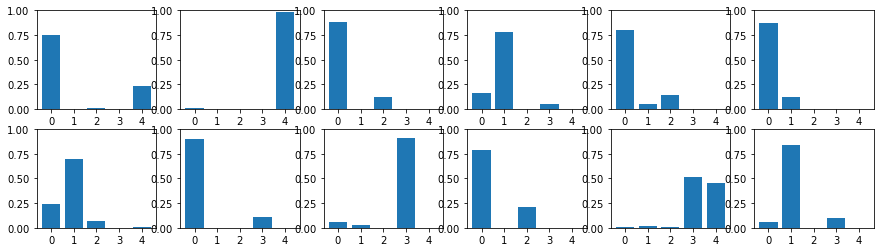

In [13]:
alfa = (0.5, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(15,4))
for i in range(1,13):
    plt.subplot(2,6,i)
    plt.bar(range(5),np.random.dirichlet(alfa, 1)[0])
    plt.ylim(0,1)
    plt.xticks(range(5))
plt.show()

# PIERWSZY JEST NAJCZĘSTSZY (bo pierwsza wartość w wektorze alfa jest największa)

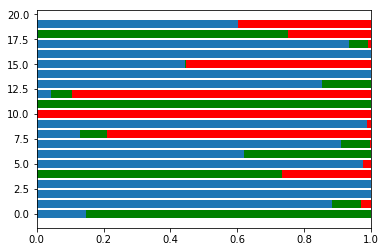

In [53]:
s = np.random.dirichlet((0.2, 0.1, 0.1), 20).transpose()

plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.show()

<br>

<br>

<br>

<br>

# Model LDA

<img src="Grafika/LDA_doc.jpg">

<br>

<br>

<br>

<br>

<img src="Grafika/Smoothed_LDA.png">


,gdzie

$\theta_d \sim Dir(\alpha)$  - rozkład tematów w dokumencie

$Z \sim Discr(\theta)$ - temat, którego pochodz słowo

$W \sim Discr(\phi_Z)$ - słowo

$\phi_i \sim Dir(\beta)$ - tematy

Dokumenty będą składać sie tylko z kilku tematów (alfa będzie mała).

Tematy będą charakteryzowane również tylko przez cześć słów (beta małe). Dzięki temu możemy ludzkim okiem rozróżnić i zintepretować tematy.

# Uwaga

W modelu LDA są 3 parametry: K - liczba tematów, wektor lub skalar alfa oraz wektor lub skalar beta.

Dobre oprogramowanie do pracy z modelem LDA to takie, które wymaga podania od użytkownika jedynie K, a parametry alfa i beta estymuje sobie sam (wykorzystując uznane metody wyznaczania optymalnych ich wartości) i pozwala wybrać czy mają być skalarami czy wektorami. Alfa w praktyce powinna być wektorem - różne wartości elementów wektora odpowiadają różnym częstościom tematów. Natomiast Beta czasem może dać lepsze wyniki jako wektor, a czasem jako skalar. Takim narzędziem jest np. MALLET (http://mallet.cs.umass.edu/). W modułach Pythona tak elastycznych funkcjonalności nie ma, ale też nie ma tragedii.

Istnieją dwie powszechnie stosowane metody dopasowaywania modelu: wnioskowanie wariacyjne oraz próbkowanie Gibbsa. Ta druga metoda jest wydajniejsza. (https://stats.stackexchange.com/questions/8485/a-good-gibbs-sampling-tutorials-and-references)

### LDA w module GENSIM

gensim to modul stworzony do analizy tekstów: https://radimrehurek.com/gensim/

In [1]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

a = [nltk.word_tokenize(x) for x in articles]

dictionary = corpora.Dictionary(a)
corpus = [dictionary.doc2bow(text) for text in a]

NameError: name 'articles' is not defined

In [55]:
dictionary.keys()[-1]  # - lista ID slow - wektor wartosci od 0 do liczby roznych slow

7108

In [56]:
dictionary.get(45)  # - slowa

'2/3'

In [57]:
dictionary.id2token[45]

'2/3'

In [58]:
corpus[1] # - dokumenty w postaci listy krotek (id slowa, licznosc wystapien tego slowa)

[(0, 4),
 (2, 3),
 (7, 2),
 (13, 1),
 (16, 19),
 (17, 43),
 (21, 61),
 (22, 2),
 (24, 1),
 (26, 1),
 (43, 5),
 (54, 1),
 (65, 2),
 (69, 1),
 (80, 4),
 (82, 1),
 (89, 1),
 (90, 1),
 (93, 1),
 (96, 2),
 (97, 1),
 (100, 1),
 (102, 2),
 (106, 2),
 (107, 4),
 (109, 1),
 (110, 5),
 (113, 10),
 (117, 1),
 (121, 3),
 (124, 3),
 (126, 4),
 (127, 2),
 (128, 8),
 (130, 1),
 (133, 9),
 (137, 1),
 (138, 1),
 (140, 1),
 (141, 4),
 (145, 1),
 (148, 22),
 (151, 1),
 (152, 1),
 (156, 2),
 (162, 1),
 (164, 3),
 (169, 1),
 (172, 11),
 (177, 1),
 (184, 11),
 (186, 1),
 (189, 3),
 (190, 1),
 (195, 1),
 (197, 7),
 (201, 1),
 (203, 1),
 (210, 2),
 (217, 7),
 (224, 6),
 (225, 1),
 (228, 1),
 (229, 6),
 (235, 2),
 (240, 2),
 (244, 2),
 (246, 8),
 (249, 2),
 (250, 2),
 (253, 2),
 (254, 3),
 (256, 4),
 (259, 6),
 (260, 1),
 (264, 5),
 (266, 4),
 (270, 1),
 (276, 18),
 (282, 13),
 (283, 21),
 (287, 1),
 (288, 1),
 (289, 4),
 (297, 1),
 (299, 1),
 (300, 2),
 (302, 8),
 (304, 5),
 (307, 1),
 (314, 1),
 (316, 2),
 (

In [59]:
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, alpha="auto")

In [ ]:
?LdaModel

"auto" dla parametrów alfa i eta (eta jest używane zamiennie z beta) oznacza, że model znajdzie optymalne wartości, ale będą to wektory.

### Wypisania rozkładów tematów w dokumentach (jest trudne bo dane są zapisane w formacie rzadkim zapisana jest tylko cześć tematów - te, które mają bardzo niski udział zostają pominięte)

In [ ]:
for i in range(len(articles)):
    print(model.get_document_topics(corpus[i],minimum_probability=0.1))

Rozkład słów w temacie $k$ - analogicznie jak wyżej, dane są w formacie rzadkim, dlatego mamy tylko najczęstsze słowa. Są to krotki (id_slowa, prawdopodobieństwo wystapienia słowa w tym temacie)

In [ ]:
# porownajmy z tematami rzeczywistymi:
titles

In [ ]:
k = 0
model.get_topic_terms(topicid=k)

In [ ]:
z = [model[dictionary.doc2bow(text)] for text in a]
z

# Wizualizacja modelu LDA:

pyLDAvis: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

### Zadanie 

Rozważamy problem klasyfikacji dokumentów z korpusu 20NEWSGROUP - chcemy nauczyć klasyfikator rozpoznawać kategorię dokumentu (tę podaną w danych). Przetestuj różne rodzaje reprezentacji tekstu (w różnych wariantach) wykorzystując kilka różnych klasyfikatorów.

Reprezentacje korpusu:

- macierz liczności wystąpień słów
- macierz tfidf
- lda (użyć obiektu z sklearna `from sklearn.decomposition import LatentDirichletAllocation`)
- LSI